In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import sys
from heapq import heappop, heappush, heapify

In [4]:
# Example of the Universities and cities with latitude and longitude around Cape Town
cities = {
    'Cape Town': (-33.916238542616234, 18.422555014936027),  
    'Observatory': (-33.9345, 18.4543), 
    'Newlands': (-33.97892311646357, 18.44819603839164), 
    'Constantia': (-34.02158858600939, 18.439993926691507), 
    'Wynberg': (-34.008296635240754, 18.467243272937477), 
    'Claremont': (-33.98604651902349, 18.47266946554379),  
    'Sea Point': (-33.91703141882901, 18.388568493629126),  
    'Table View': (-33.821876056157556, 18.492138278143443),  
    'Milnerton': (-33.86687509814964, 18.53562241057766), 
    'Blaauwberg': (-33.82797465949754, 18.50246546022581), 
    'Hout Bay': (-34.038367135228256, 18.349470520432025), 
    'Fish Hoek': (-34.13381255066271, 18.42313258270119),
    'Bellville': (-33.893908989629345, 18.628340941450343),
    'Durbanville': (-33.82764258801154, 18.65212169012901),
    'Somerset West': (-34.075690207020905, 18.84274091305864),
    'Simons Town': (-34.19329663218895, 18.43871544732048), 
    'Stellenbosch': (-33.93185274397466, 18.8562560657256), 
    'Muizenberg': (-34.10726461456983, 18.470559244594554),
    'University of Cape Town (UCT)': (-33.957631807516535, 18.460968217900675),
    'University of the Western Cape (UWC)': (-33.932974209721, 18.62742874304422),
    'Rondebosch': (-33.9674121511884, 18.46661251440095),
    'Russel': (-33.926687157976595, 18.43532571875443),
    'Koeberg Rd': (-33.88755516754871, 18.494682026210477),
    'Belhar': (-33.94837938657596, 18.59900525450159),
    'Mowbray': (-33.94893464373641, 18.485057029635552),
    'Polkadraai Rd': (-33.96089533806072, 18.758341915817304),
    'Kempenville': (-33.901075057912045, 18.636462349743788),
    'Strand': (-34.11226505618873, 18.8509158473707),
    'Green Point': (-33.90697885895539, 18.40411388797455),
    'Blaauwberg': (-33.8100656964679, 18.476499938589743),
    'Camp Bay' :(-33.95122170143391 , 18.38249378600005),
    'Cape Point': (-34.250432907619, 18.425356160278916)   
}

In [5]:
data = pd.read_csv("/home/delien/Documents/DELIEN PROJECT AIMS/Data_Muizenberg/Cape_Town_Cities1.csv")


In [6]:
data

,Cities,Latitude,Longitude,Start_city,End_city,Distances (kilometers)
0,Cape Town,-33.916239,18.422555,Cape Town,University of the Western Cape (UWC),21.8
1,Observatory,-33.934500,18.454300,Cape Town,Observatory,5.0
2,Newlands,-33.978923,18.448196,Cape Town,Camp Bay,6.7
3,Constantia,-34.021589,18.439994,Cape Town,Observatory,5.1
4,Wynberg,-34.008297,18.467243,Cape Town,Sea Point,4.8
...,...,...,...,...,...,...
135,NaN,NaN,NaN,Blaauwberg,Durbanville,20.0
136,NaN,NaN,NaN,Camp Bay,Cape Town,6.7
137,NaN,NaN,NaN,Cape Point,Simons Town,12.4
138,NaN,NaN,NaN,Camp Bay,Sea Point,5.2


In [7]:
data.head()

,Cities,Latitude,Longitude,Start_city,End_city,Distances (kilometers)
0,Cape Town,-33.916239,18.422555,Cape Town,University of the Western Cape (UWC),21.8
1,Observatory,-33.934500,18.454300,Cape Town,Observatory,5.0
2,Newlands,-33.978923,18.448196,Cape Town,Camp Bay,6.7
3,Constantia,-34.021589,18.439994,Cape Town,Observatory,5.1
4,Wynberg,-34.008297,18.467243,Cape Town,Sea Point,4.8


In [8]:
data = data.drop(['Cities', 'Latitude', 'Longitude'], axis=1)
data.head()

,Start_city,End_city,Distances (kilometers)
0,Cape Town,University of the Western Cape (UWC),21.8
1,Cape Town,Observatory,5.0
2,Cape Town,Camp Bay,6.7
3,Cape Town,Observatory,5.1
4,Cape Town,Sea Point,4.8


In [9]:
def bellman_ford(graph, source):
    distances = {vertex: float('inf') for vertex in graph}
    distances[source] = 0

    for _ in range(len(graph) - 1):
        for u in graph:
            for v, weight in graph[u].items():
                if distances[u] != float('inf') and distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight

    for u in graph:
        for v, weight in graph[u].items():
            if distances[u] != float('inf') and distances[u] + weight < distances[v]:
                raise ValueError("Graph contains negative weight cycle")

    return distances

In [8]:
def Dijkstra(graph, src, dest):
    inf = sys.maxsize
    d = {node: {'distance': inf, 'pred': []} for node in graph}
    d[src]['distance'] = 0

    visited = []
    queue = [(0, src)]
    heapify(queue)

    while queue:
        distance, vertex = heappop(queue)
        if vertex not in visited:
            visited.append(vertex)
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    new_distance = d[vertex]['distance'] + graph[vertex][neighbor]
                    if new_distance < d[neighbor]['distance']:
                        d[neighbor]['distance'] = new_distance
                        d[neighbor]['pred'] = d[vertex]['pred'] + [vertex]
                        heappush(queue, (d[neighbor]['distance'], neighbor))

    shortest_distance = d[dest]['distance']
    shortest_path = d[dest]['pred'] + [dest]
    
    print("Shortest Distance: " + str(shortest_distance))
    print("Shortest Path: " + ' -> '.join(shortest_path))
    
    return shortest_path

In [9]:
cities_names = data['Start_city'].unique()
cities_names

array(['Cape Town', 'Observatory', 'Newlands', 'Constantia', 'Wynberg',
       'Claremont', 'Sea Point', 'Table View', 'Milnerton', 'Blaauwberg',
       'Hout Bay', 'Fish Hoek', 'Bellville', 'Durbanville',
       'Somerset West', 'Simons Town', 'Stellenbosch', 'Muizenberg',
       'University of Cape Town (UCT)',
       'University of the Western Cape (UWC)', 'Rondebosch', 'Russel',
       'Koeberg Rd', 'Belhar', 'Mowbray', 'Polkadraai Rd', 'Kempenville',
       'Strand', 'Camp Bay', 'Cape Point'], dtype=object)

In [10]:
graph_cities = {}
for i, name in zip(range(len(cities_names)), cities_names):
    dico = {}
    data1 = data.query(f'Start_city == "{cities_names[i]}"')
    for index, city in zip(data1.index, data.query(f'Start_city == "{cities_names[i]}"')['End_city'].values):
        dico[city] = data1['Distances (kilometers)'][index]
    graph_cities[name] = dico

In [11]:
graph_cities

{'Cape Town': {'University of the Western Cape (UWC)': 21.8,
  'Observatory': 5.1,
  'Camp Bay': 6.7,
  'Sea Point': 4.8,
  'Table View': 19.0,
  'Bellville': 20.0,
  'Kempenville': 20.0,
  'Stellenbosch': 44.0,
  'Wynberg': 3.0},
 'Observatory': {'Cape Town': 5.0,
  'Newlands': 6.0,
  'Claremont': 6.0,
  'Rondebosch': 4.0,
  'Mowbray': 3.0},
 'Newlands': {'Observatory': 6.0,
  'Claremont': 3.1,
  'Wynberg': 4.4,
  'Constantia': 8.8,
  'Rondebosch': 3.7,
  'Muizenberg': 14.8},
 'Constantia': {'Wynberg': 5.2,
  'Newlands': 8.8,
  'Hout Bay': 10.5,
  'Claremont': 8.0,
  'Fish Hoek': 17.9,
  'Muizenberg': 10.0},
 'Wynberg': {'Russel': 21.0,
  'Claremont': 3.0,
  'Newlands': 4.4,
  'Constantia': 5.1,
  'Muizenberg': 10.8,
  'Fish Hoek': 17.5,
  'Polkadraai Rd': 37.6},
 'Claremont': {'University of Cape Town (UCT)': 4.9,
  'Newlands': 3.1,
  'Observatory': 6.0,
  'Rondebosch': 2.9,
  'Russel': 26.0,
  'Muizenberg': 13.0},
 'Sea Point': {'Cape Town': 4.3, 'Camp Bay': 5.2},
 'Table View': {'R

In [12]:
Dijkstra(graph_cities, src = 'Stellenbosch', dest = 'Muizenberg')

Shortest Distance: 42.9
Shortest Path: Stellenbosch -> Muizenberg


['Stellenbosch', 'Muizenberg']

In [13]:
bellman_ford(graph_cities, source = 'Cape Town')

{'Cape Town': 0,
 'Observatory': 5.1,
 'Newlands': 7.4,
 'Constantia': 8.1,
 'Wynberg': 3.0,
 'Claremont': 6.0,
 'Sea Point': 4.8,
 'Table View': 19.0,
 'Milnerton': 28.0,
 'Blaauwberg': 20.5,
 'Hout Bay': 18.6,
 'Fish Hoek': 20.5,
 'Bellville': 20.0,
 'Durbanville': 28.1,
 'Somerset West': 46.800000000000004,
 'Simons Town': 29.0,
 'Stellenbosch': 42.3,
 'Muizenberg': 13.8,
 'University of Cape Town (UCT)': 8.85,
 'University of the Western Cape (UWC)': 21.8,
 'Rondebosch': 8.9,
 'Russel': 24.0,
 'Koeberg Rd': 25.8,
 'Belhar': 24.0,
 'Mowbray': 8.1,
 'Polkadraai Rd': 32.0,
 'Kempenville': 20.0,
 'Strand': 53.1,
 'Camp Bay': 6.7,
 'Cape Point': 41.4}

Shortest Distance: 42.3
Shortest Path: Cape Town -> Wynberg -> Russel -> Polkadraai Rd -> Stellenbosch


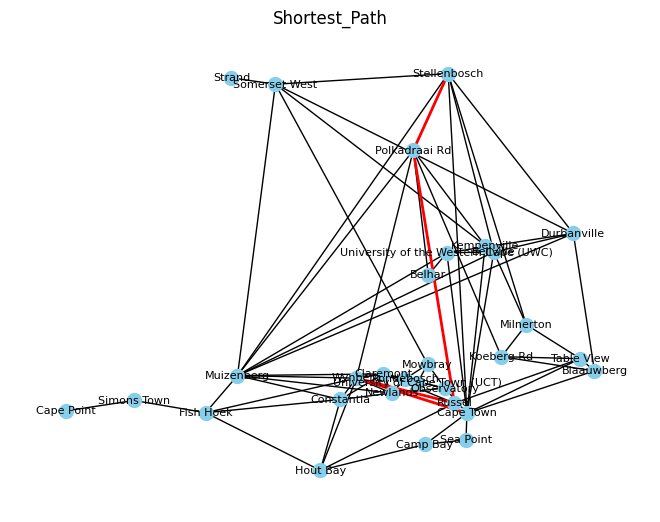

In [20]:
source = 'Cape Town'
destination = 'Stellenbosch'
shortest_path = Dijkstra(graph_cities, source, destination)

# We create a graph
G = nx.Graph()
for node, edges in graph_cities.items():
    for neighbor, weight in edges.items():
        G.add_edge(node, neighbor, weight=weight)

# We plot of the graph
pos = cities
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)
nx.draw_networkx_edges(G, pos, edgelist=list(zip(shortest_path, shortest_path[1:])), edge_color='r', width=2)


plt.title("Shortest_Path")
plt.show()